# Carregamento dos Dados

## Download

In [7]:
import os
import tarfile
from six.moves import urllib

In [8]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [9]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [10]:
fetch_housing_data()

## Importação

In [11]:
import pandas as pd

In [12]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [13]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

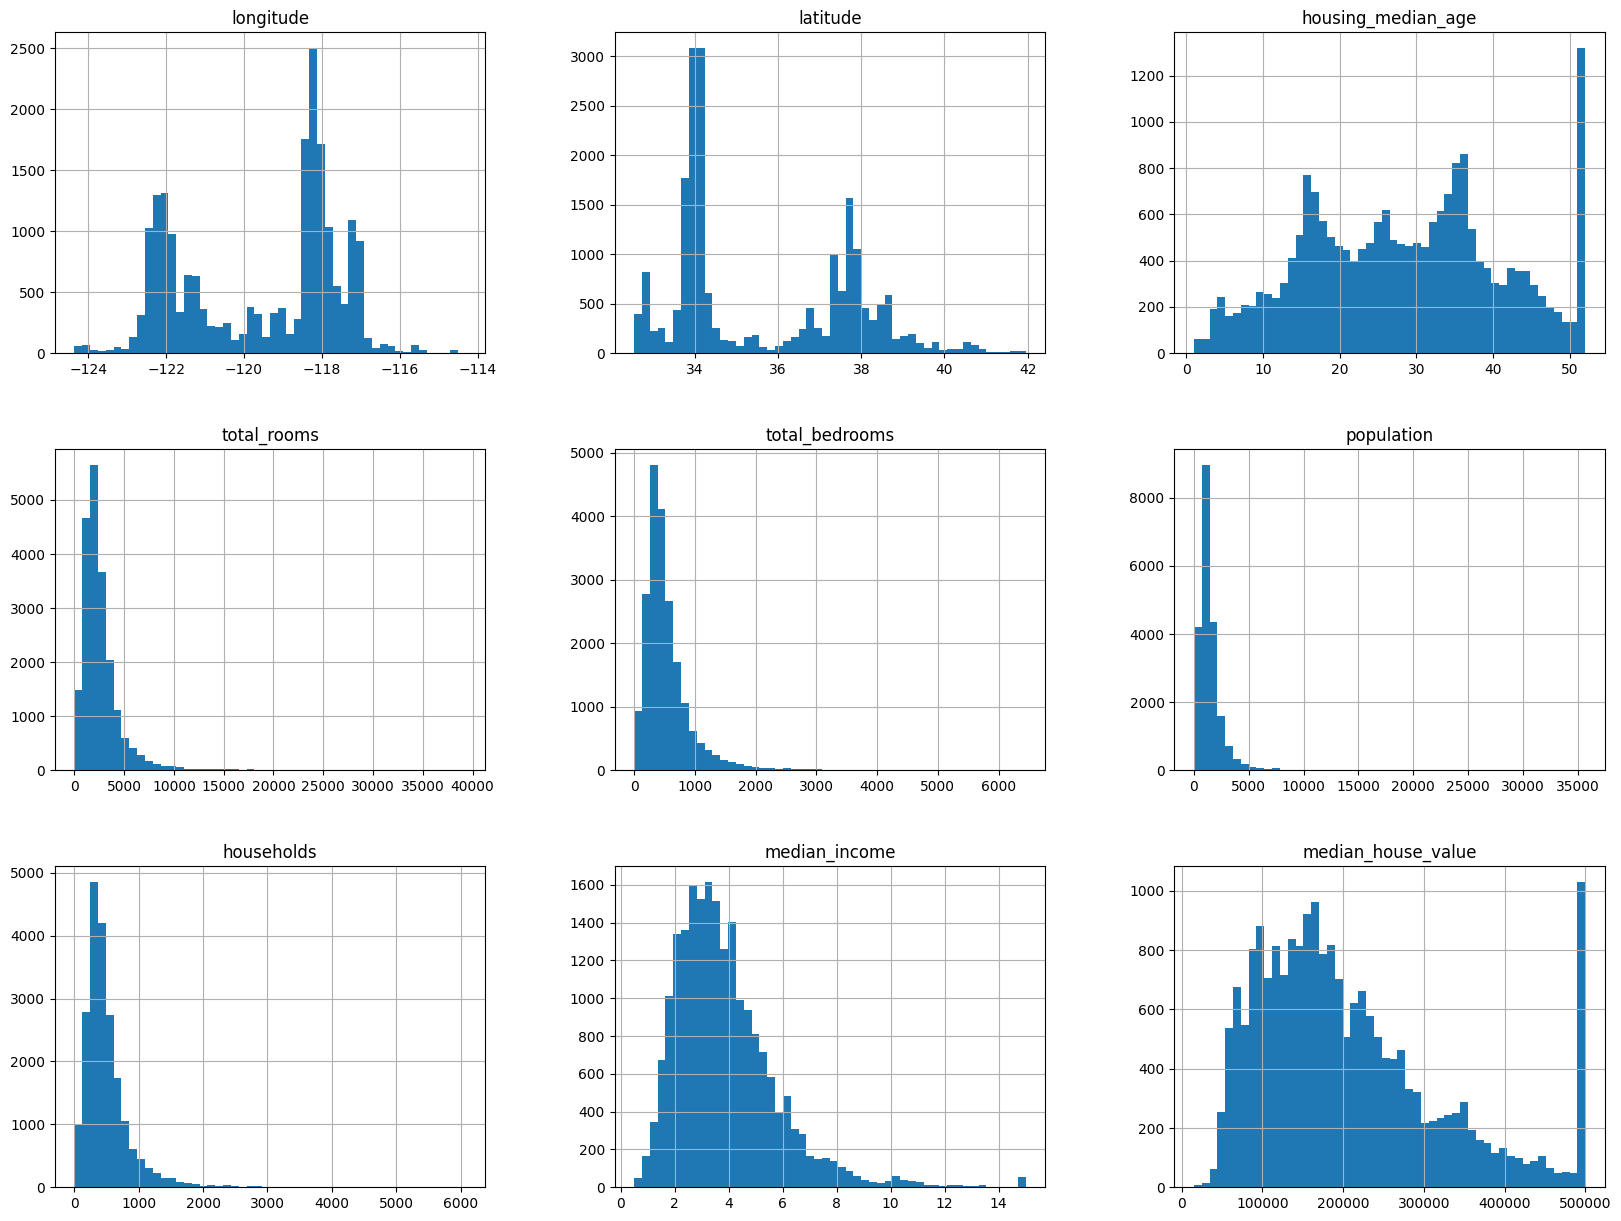

In [18]:
housing.hist(bins=50,figsize=(20,15))
plt.show() # opcional no Jupyter

In [19]:
import numpy as np

## Separação Treino-Teste

In [20]:
def split_train_test(data,test_ratio=0.25):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [21]:
train_set,test_set=split_train_test(housing,0.2)

In [22]:
print(len(train_set),"train +",len(test_set),"test")

16512 train + 4128 test


## Separação Treino-Teste `Scikit-learn`

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=1)

In [25]:
print(len(train_set),"train +",len(test_set),"test")

16512 train + 4128 test


### Amostragem Estratificada

In [26]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)

In [27]:
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)
# sintaxe .where(CONDICAO em X,Y)
## se CONDICAO, X, senão, Y

<AxesSubplot:>

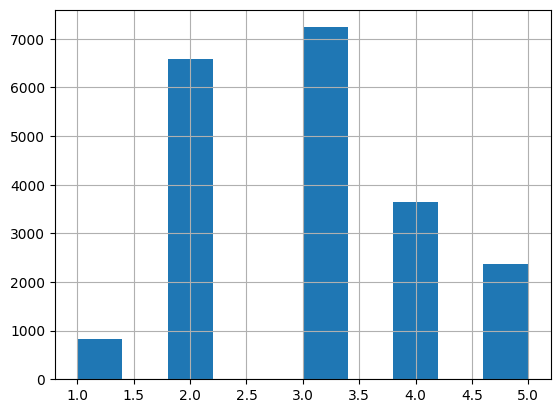

In [28]:
housing["income_cat"].hist()

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=1)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [31]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [32]:
housing["income_cat"].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [33]:
# elimina a coluna 'income_cat' dos datasets de treino e teste
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

# EDA

In [34]:
housing=strat_train_set.copy()

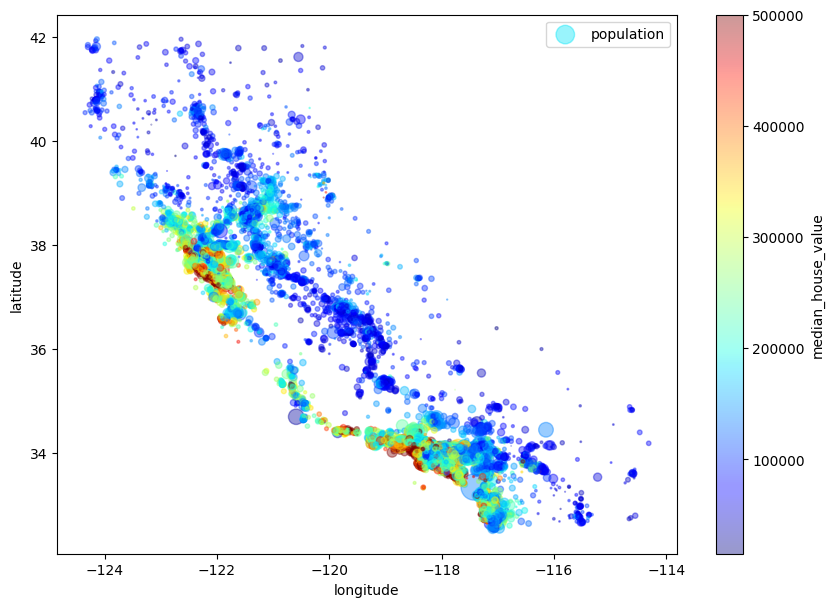

In [35]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
            s=housing["population"]/100, # raio dos círculos porporcionais à população
            label="population",figsize=(10,7),
            c="median_house_value", # cor variando com o preço médio das casas
             cmap=plt.get_cmap("jet"), # mapa de cores 'jet',
            colorbar=True)
plt.legend()

## Análise de Correlação

In [36]:
corr_matrix=housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924134,-0.111588,0.044415,0.070146,0.100851,0.055818,-0.013672,-0.043824
latitude,-0.924134,1.000000,0.015882,-0.034892,-0.066266,-0.107384,-0.069504,-0.082153,-0.146748
housing_median_age,-0.111588,0.015882,1.000000,-0.361921,-0.321678,-0.301220,-0.305833,-0.115020,0.107684
total_rooms,0.044415,-0.034892,-0.361921,1.000000,0.929588,0.859194,0.917847,0.198109,0.133566
total_bedrooms,0.070146,-0.066266,-0.321678,0.929588,1.000000,0.878086,0.979825,-0.007167,0.049941
population,0.100851,-0.107384,-0.301220,0.859194,0.878086,1.000000,0.907188,0.008148,-0.025008
households,0.055818,-0.069504,-0.305833,0.917847,0.979825,0.907188,1.000000,0.013529,0.065778
median_income,-0.013672,-0.082153,-0.115020,0.198109,-0.007167,0.008148,0.013529,1.000000,0.684828
median_house_value,-0.043824,-0.146748,0.107684,0.133566,0.049941,-0.025008,0.065778,0.684828,1.000000


In [37]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

In [ ]:
import pandas as pd

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

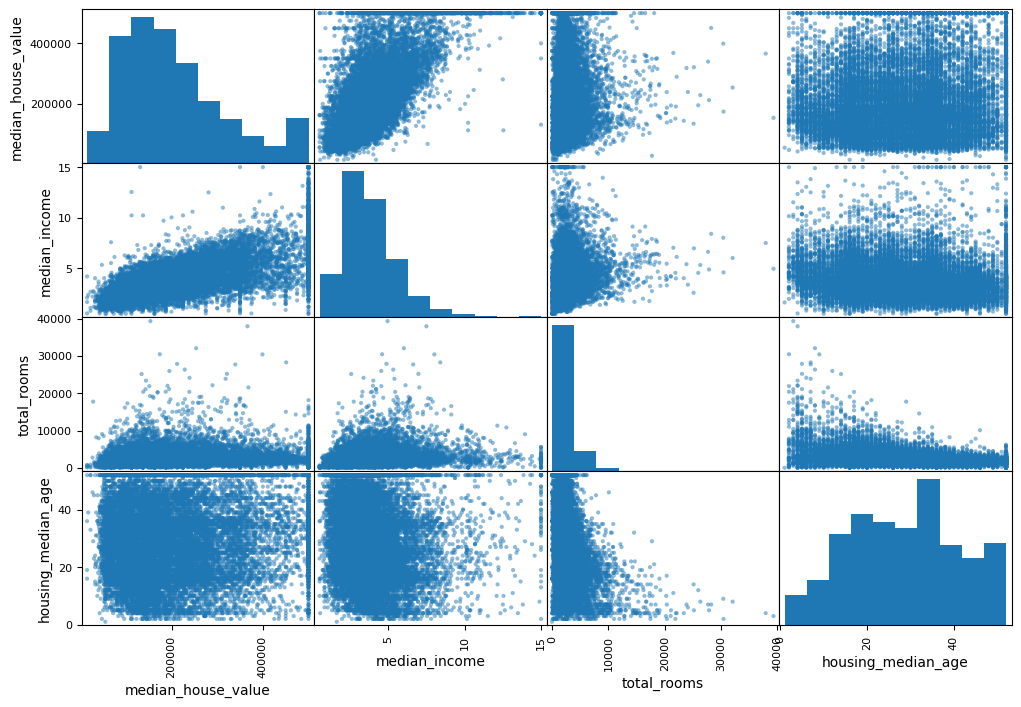

In [39]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes],figsize=(12,8))